In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
birddata=pd.read_csv("bird_tracking.csv")#lifewatch INBO project

In [4]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [5]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [10]:
import matplotlib.pyplot as plt

%matplotlib inline 

In [11]:
bird_names=pd.unique(birddata.bird_name)

In [12]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [13]:
import cartopy.crs as ccrs

In [14]:
import cartopy.feature as cfeature

In [15]:
proj = ccrs.Mercator()

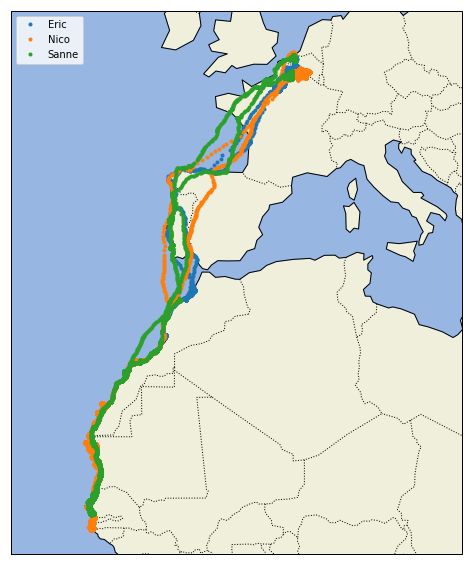

In [31]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,linestyle=':')

for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix],birddata.latitude[ix]
    ax.plot (x,y,".",transform=ccrs.Geodetic(),label=name)
plt.legend(loc="upper left")
plt.savefig("map.pdf")

In [16]:
birddata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [18]:
birddata.speed_2d.plot(kind='hist',range=[0,30])
plt.xlabel("2d speed")